In [ ]:
import pandas as pd
scores = pd.read_csv("./importance_scores.tsv", sep="\t")
dgidb = pd.read_csv("../../Data/DGIDB/converted/human/dgidb_ncbi_v3.csv")
NCBI_PATH = "../../Data/ncbi/gene2refseq.gz"
NCBI_INFO = pd.read_csv(NCBI_PATH, sep='\t', compression='gzip')

c:\Users\richa\Desktop\CodingWorkspaces\DGI-Hypergraph\datatestingvenv\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\richa\Desktop\CodingWorkspaces\DGI-Hypergraph\datatestingvenv\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (2,4,6,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
scores = pd.read_csv("./importance_scores.tsv", sep="\t")


In [27]:

import pandas as pd

# Assume NCBI_INFO is your DataFrame
# Filter for Homo sapiens genes (tax_id = 9606)
human_gene2refseq = NCBI_INFO[NCBI_INFO['#tax_id'] == 9606]

# Create a mapping from NCBI gene IDs (GeneID) to gene claim names (Symbol)
id_to_gene_claim = pd.Series(human_gene2refseq.Symbol.values, index=human_gene2refseq.GeneID).to_dict()

# Example usage
ncbi_gene_id = 473  # Replace with your desired NCBI Gene ID
gene_claim_name = id_to_gene_claim.get(ncbi_gene_id, "Gene claim name not found")
print(f"Gene claim name for NCBI Gene ID {ncbi_gene_id}: {gene_claim_name}")


Gene claim name for NCBI Gene ID 473: RERE


In [28]:
import json

# Load the JSON data from the file
with open('../../Data/hypergraphs/DGIDB_HumanNet/human/undirected/bipolar/gene_to_index.json', 'r') as file:
    gene_to_index = json.load(file)

# Invert the dictionary to map indices back to genes
index_to_gene = {v: k for k, v in gene_to_index.items()}

def get_gene_by_index(index):
    return index_to_gene.get(index, "Index not found")


In [29]:
# Function to get the gene_claim_name from ncbi_gene_id
def get_gene_claim_name_via_DGIDB(gene_index):
    ncbi_gene_id = int(get_gene_by_index(gene_index))
    # result = dgidb[dgidb['ncbi_gene_id'] == ncbi_gene_id]
    result = dgidb[(dgidb['ncbi_gene_id']) == ncbi_gene_id]
    if not result.empty:
        return result['gene_claim_name'].values[0]
    else:
        return "DGIDB GENE CLAIM NAME NOT FOUND"
def get_gene_claim_name_via_NCBI(gene_index):
    ncbi_gene_id = int(get_gene_by_index(gene_index))
    return id_to_gene_claim.get(ncbi_gene_id, "NCBI GENE CLIAIM NAME NOT FOUND")
    
scores['claim_name'] = scores['Gene'].apply(lambda gene: get_gene_claim_name_via_NCBI(gene))


In [30]:
scores.rename(columns={'Gene': 'ncbi_gene_id', 'Score': 'score'}, inplace=True)


In [31]:
# Apply the function to all rows in the 'ncbi_gene_id' column
scores['ncbi_gene_id'] = scores['ncbi_gene_id'].apply(get_gene_by_index)

In [33]:
# print(scores.iloc[7])
scores = scores.drop(index=9)
scores = scores.drop(index=5)

print(scores.head(10))

   ncbi_gene_id     score claim_name
0          1576  0.003661     CYP3A4
1          1544  0.003643     CYP1A2
2          1565  0.003290     CYP2D6
3          1813  0.002824       DRD2
4          1559  0.002619     CYP2C9
6           215  0.002590      ABCD1
7            12  0.002590   SERPINA3
8           262  0.002590       AMD1
10         3356  0.002497      HTR2A
11            1  0.002264       A1BG


Index(['ncbi_gene_id', 'score', 'claim_name'], dtype='object')


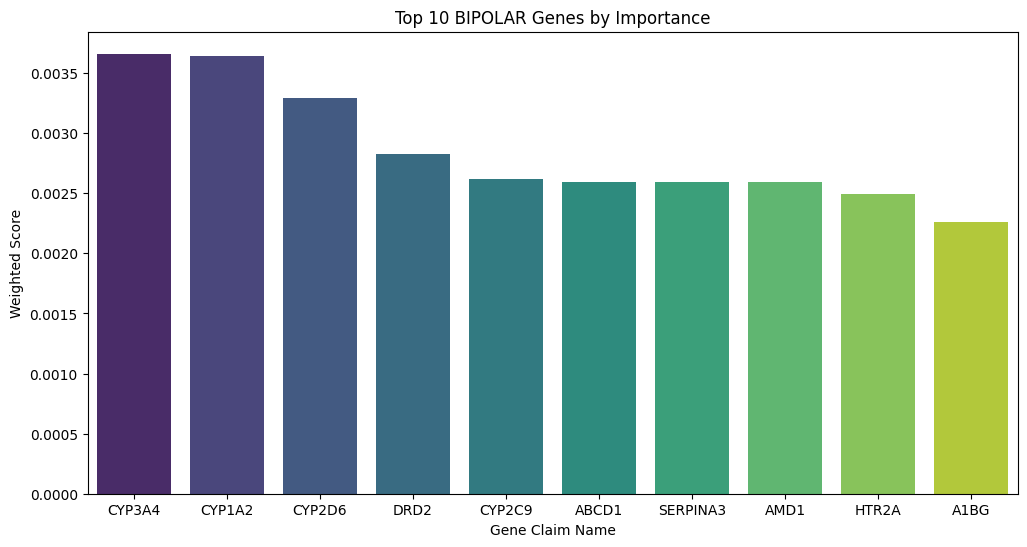

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Use the top 10 genes
df_top_10 = scores.head(10)
# Check the column names
print(scores.columns)
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='claim_name', y='score', data=df_top_10, palette='viridis')
plt.title('Top 10 BIPOLAR Genes by Importance')
plt.xlabel('Gene Claim Name')
plt.ylabel('Weighted Score')
plt.show()


In [35]:
scores.to_csv("./importance_scores_BIPOLAR_INcomplete.tsv", sep="\t", index=False)